<a href="https://colab.research.google.com/github/fyusuft/latihan_Kmeans---DBScan-Clustering/blob/main/Latihan_K_mean_%26_DBScan_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📂 Silakan upload file CSV kamu (misalnya 'breast_cancer.csv'):


Saving breast_cancer.csv to breast_cancer (4).csv
✅ File 'breast_cancer (4).csv' berhasil di-upload!
Dataset berhasil dimuat!
Shape: (569, 33)

Kolom yang tersedia:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Data head:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  843

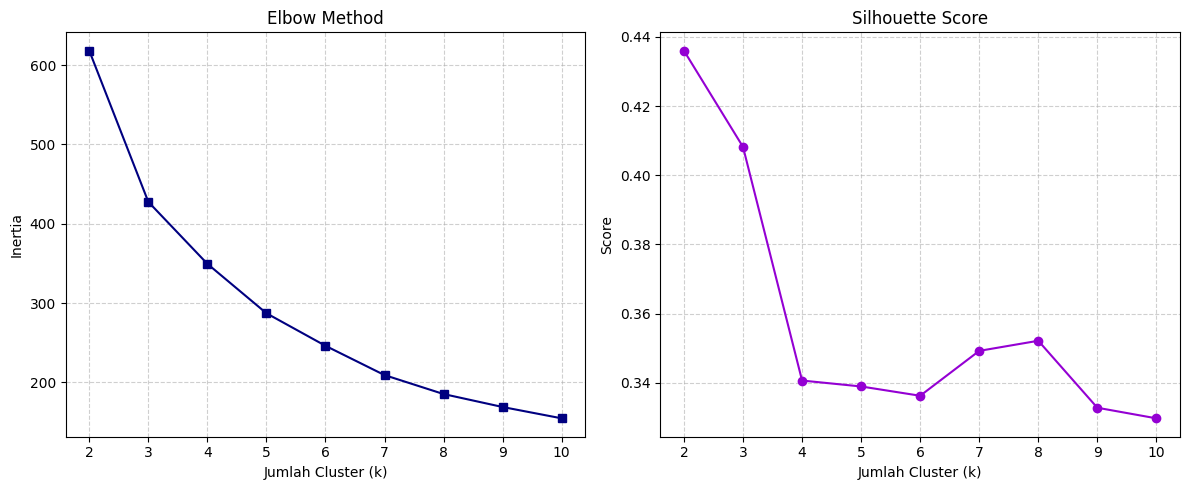

✅ Nilai k optimal berdasarkan silhouette score: 2


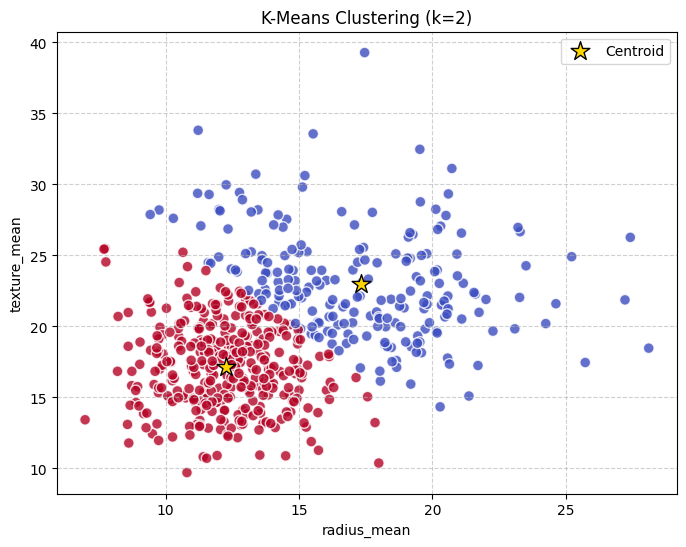

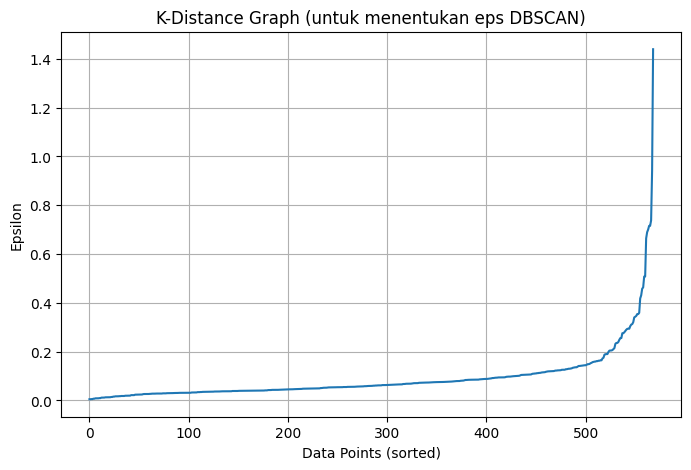

Jumlah cluster DBSCAN: 1
Jumlah noise points: 20


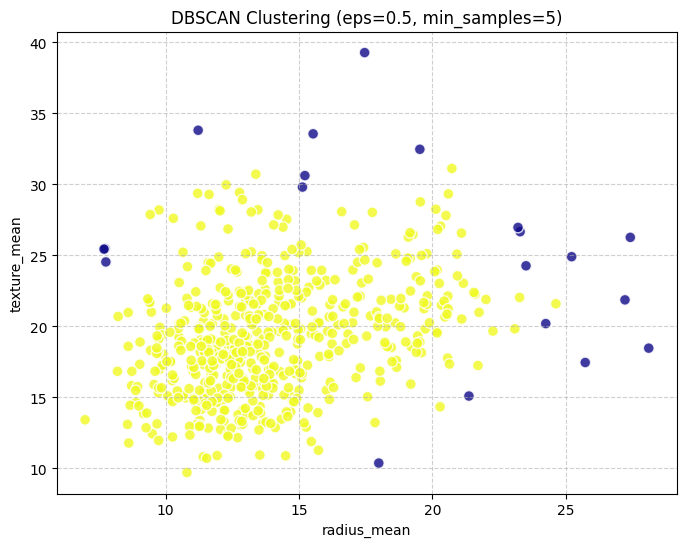

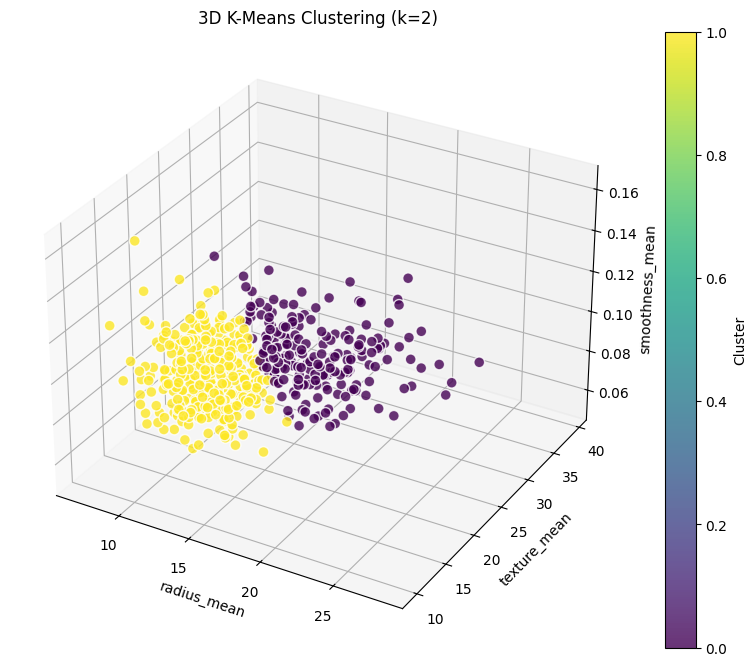


Ringkasan KMeans_Cluster:
   KMeans_Cluster  radius_mean  texture_mean  smoothness_mean  Cluster_Size
0               0    17.318371     22.987429         0.098744           210
1               1    12.260643     17.126602         0.094966           359

Ringkasan DBSCAN_Cluster:
   DBSCAN_Cluster  radius_mean  texture_mean  smoothness_mean  Cluster_Size
0              -1    19.229500     25.379500         0.100360            20
1               0    13.941419     19.067796         0.096215           549


In [6]:
# =============================================
# 📊 K-MEANS & DBSCAN CLUSTERING - BREAST CANCER DATA
# =============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files

# -----------------------------
# 1. Upload File Manual ke Colab
# -----------------------------
print("📂 Silakan upload file CSV kamu (misalnya 'breast_cancer.csv'):")
uploaded = files.upload()

# Ambil nama file yang di-upload
file_name = list(uploaded.keys())[0]
print(f"✅ File '{file_name}' berhasil di-upload!")

# -----------------------------
# 2. Load & Preprocess Data
# -----------------------------
def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")
    return data

# -----------------------------
# 3. Eksplorasi Awal
# -----------------------------
def explore_data(data):
    print("Shape:", data.shape)
    print("\nKolom yang tersedia:")
    print(data.columns.tolist())
    print("\nData head:")
    print(data.head())
    print("\nCek missing values:")
    print(data.isnull().sum())

# -----------------------------
# 4. Feature Preparation
# -----------------------------
def prepare_features(data, features):
    X = data[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X, X_scaled, scaler

# -----------------------------
# 5. Cari k optimal (Elbow & Silhouette)
# -----------------------------
def find_optimal_k(X_scaled, k_range=range(2, 11)):
    inertia = []
    silhouette_scores = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertia, 's-', color='navy')
    plt.title('Elbow Method')
    plt.xlabel('Jumlah Cluster (k)')
    plt.ylabel('Inertia')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_scores, 'o-', color='darkviolet')
    plt.title('Silhouette Score')
    plt.xlabel('Jumlah Cluster (k)')
    plt.ylabel('Score')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

    best_k = k_range[np.argmax(silhouette_scores)]
    print(f"✅ Nilai k optimal berdasarkan silhouette score: {best_k}")
    return best_k

# -----------------------------
# 6. K-Means Clustering
# -----------------------------
def perform_kmeans(X_scaled, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    return kmeans, labels

def plot_kmeans_clusters(X, kmeans, labels, scaler, feature_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature_names[0]], X[feature_names[1]],
                c=labels, cmap='coolwarm', s=60, alpha=0.8, edgecolor='w')

    # Plot centroid
    plt.scatter(kmeans.cluster_centers_[:, 0]*scaler.scale_[0] + scaler.mean_[0],
                kmeans.cluster_centers_[:, 1]*scaler.scale_[1] + scaler.mean_[1],
                s=200, marker='*', c='gold', edgecolor='black', label='Centroid')

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'K-Means Clustering (k={kmeans.n_clusters})')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# -----------------------------
# 7. DBSCAN Clustering
# -----------------------------
def find_optimal_epsilon(X_scaled, n_neighbors=2):
    neighbors = NearestNeighbors(n_neighbors=n_neighbors)
    neighbors_fit = neighbors.fit(X_scaled)
    distances, indices = neighbors_fit.kneighbors(X_scaled)

    distances = np.sort(distances[:, 1])
    plt.figure(figsize=(8, 5))
    plt.plot(distances)
    plt.title('K-Distance Graph (untuk menentukan eps DBSCAN)')
    plt.xlabel('Data Points (sorted)')
    plt.ylabel('Epsilon')
    plt.grid(True)
    plt.show()
    return distances

def perform_dbscan(X_scaled, epsilon, min_samples):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f'Jumlah cluster DBSCAN: {n_clusters}')
    print(f'Jumlah noise points: {n_noise}')
    return dbscan, labels

def plot_dbscan_clusters(X, labels, epsilon, min_samples, feature_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature_names[0]], X[feature_names[1]],
                c=labels, cmap='plasma', s=60, alpha=0.8, edgecolor='w')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'DBSCAN Clustering (eps={epsilon}, min_samples={min_samples})')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# -----------------------------
# 8. Plot 3D Cluster
# -----------------------------
def plot_3d_clusters(X, labels, algorithm_name, params, feature_names):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[feature_names[0]], X[feature_names[1]], X[feature_names[2]],
                         c=labels, cmap='viridis', s=60, alpha=0.8, edgecolor='w')
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_zlabel(feature_names[2])
    ax.set_title(f'3D {algorithm_name} Clustering ({params})')
    fig.colorbar(scatter, ax=ax, label='Cluster')
    plt.show()

# -----------------------------
# 9. Summary Statistik
# -----------------------------
def generate_cluster_summary(data, cluster_column, metrics):
    summary = data.groupby(cluster_column)[metrics].mean().reset_index()
    summary['Cluster_Size'] = data[cluster_column].value_counts().sort_index().values
    print(f"\nRingkasan {cluster_column}:")
    print(summary)
    return summary

# -----------------------------
# 10. Main Program
# -----------------------------
def main():
    data = load_and_preprocess_data(file_name)
    explore_data(data)

    # Pilih fitur
    feature_names_2d = ['radius_mean', 'texture_mean']
    feature_names_3d = ['radius_mean', 'texture_mean', 'smoothness_mean']
    X_2d, X_2d_scaled, scaler_2d = prepare_features(data, feature_names_2d)

    # K-Means
    optimal_k = find_optimal_k(X_2d_scaled)
    kmeans_2d, kmeans_labels_2d = perform_kmeans(X_2d_scaled, optimal_k)
    plot_kmeans_clusters(X_2d, kmeans_2d, kmeans_labels_2d, scaler_2d, feature_names_2d)
    data['KMeans_Cluster'] = kmeans_labels_2d

    # DBSCAN
    find_optimal_epsilon(X_2d_scaled)
    epsilon, min_samples = 0.5, 5
    dbscan, dbscan_labels = perform_dbscan(X_2d_scaled, epsilon, min_samples)
    plot_dbscan_clusters(X_2d, dbscan_labels, epsilon, min_samples, feature_names_2d)
    data['DBSCAN_Cluster'] = dbscan_labels

    # 3D Clustering
    feature_names_3d = ['radius_mean', 'texture_mean', 'smoothness_mean']
    X_3d, X_3d_scaled, scaler_3d = prepare_features(data, feature_names_3d)
    kmeans_3d, kmeans_labels_3d = perform_kmeans(X_3d_scaled, optimal_k)
    plot_3d_clusters(X_3d, kmeans_labels_3d, 'K-Means', f'k={optimal_k}', feature_names_3d)

    # Ringkasan statistik
    metrics = ['radius_mean', 'texture_mean', 'smoothness_mean']
    generate_cluster_summary(data, 'KMeans_Cluster', metrics)
    generate_cluster_summary(data, 'DBSCAN_Cluster', metrics)

if __name__ == "__main__":
    main()


In [3]:
import pandas as pd

data = pd.read_csv("breast_cancer.csv")  # sesuaikan nama file kamu di notebook
print(data.columns.tolist())

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
